HEIRARCHICAL CLUSTERING

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [6]:
import warnings
warnings.filterwarnings ("ignore")

In [7]:
crime=pd.read_csv("crime_data.csv")

In [8]:
crime.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [10]:
crime.rename( columns={'Unnamed: 0':'Places'},inplace=True) # let's rename tht unnmaed column
crime.head(2)

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [11]:
# normalizing the dataset by min-max scaler
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
crime_norm=norm_fun(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [13]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


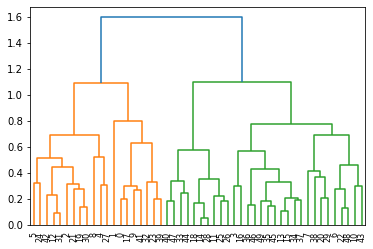

In [14]:
# create a dendrogram 
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='complete'))

In [15]:
h_crime=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
h_crime.fit_predict(crime_norm)

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [16]:
y_crime=h_crime.fit_predict(crime_norm)
crime['h_cluster']=y_crime

In [17]:
y_crime

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [18]:
crime.head(3)

,Places,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

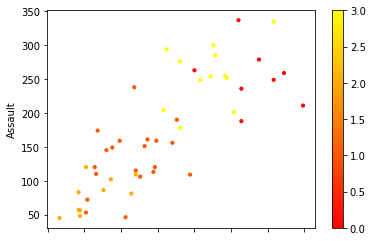

In [19]:
crime.plot(x='Murder',y='Assault',c=y_crime,kind='scatter',s=10,cmap=plt.cm.autumn)

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

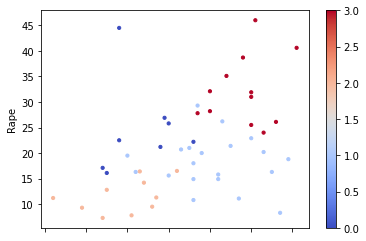

In [20]:
crime.plot(x='UrbanPop',y='Rape',c=y_crime,kind='scatter',s=10,cmap=plt.cm.coolwarm)

In [21]:
crime.groupby(['h_cluster'])['Places'].apply(lambda x: tuple(x))

h_cluster
0    (Alabama, Alaska, Georgia, Louisiana, Mississi...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Arizona, California, Colorado, Florida, Illin...
Name: Places, dtype: object

# KMEANS

In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [23]:
crime_norm_k=norm_fun(crime.iloc[:,1:5])
crime_norm_k.head(4)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245


In [24]:
model_kmeans=KMeans(n_clusters=4)
model_kmeans.fit(crime_norm_k)

KMeans(n_clusters=4)

In [25]:
model_kmeans.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [26]:
crime['cluster_k']=pd.Series(model_kmeans.labels_)
crime

,Places,Murder,Assault,UrbanPop,Rape,h_cluster,cluster_k
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,3,0
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,0
5,Colorado,7.9,204,78,38.7,3,0
6,Connecticut,3.3,110,77,11.1,1,3
7,Delaware,5.9,238,72,15.8,1,3
8,Florida,15.4,335,80,31.9,3,0
9,Georgia,17.4,211,60,25.8,0,2


In [27]:
crime.groupby(['cluster_k'])['Places'].apply(lambda x :tuple(x))

cluster_k
0    (Alaska, Arizona, California, Colorado, Florid...
1    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
2    (Alabama, Arkansas, Georgia, Louisiana, Missis...
3    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
Name: Places, dtype: object

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

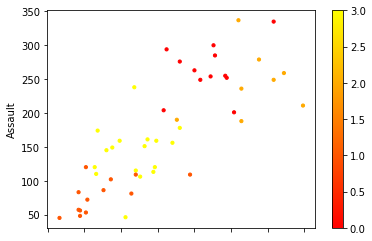

In [28]:
crime.plot(x='Murder',y='Assault',c=model_kmeans.labels_,kind='scatter',s=10,cmap=plt.cm.autumn)

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

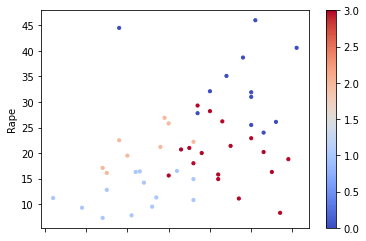

In [29]:
crime.plot(x='UrbanPop',y='Rape',c=model_kmeans.labels_,kind='scatter',s=10,cmap=plt.cm.coolwarm)

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [31]:
crime.head()

,Places,Murder,Assault,UrbanPop,Rape,h_cluster,cluster_k
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,3,0
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,0


In [32]:
array=(crime.iloc[:,1:5]).values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [33]:
# normalising the dataset by standrad scaler technique
strd_sclr=StandardScaler().fit(array)
x=strd_sclr.transform(array)

In [34]:
dbscan=DBSCAN(eps=0.8,min_samples=4,metric='euclidean',algorithm='auto')
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=4)

In [35]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [36]:
crime[['DBSCAN_cluster']]=dbscan.labels_

In [37]:
crime.head()

,Places,Murder,Assault,UrbanPop,Rape,h_cluster,cluster_k,DBSCAN_cluster
0,Alabama,13.2,236,58,21.2,0,2,-1
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,3,0,-1
3,Arkansas,8.8,190,50,19.5,1,2,-1
4,California,9.0,276,91,40.6,3,0,-1


In [38]:
crime.groupby(['DBSCAN_cluster'])['Places'].apply(lambda x: tuple(x))

DBSCAN_cluster
-1    (Alabama, Alaska, Arizona, Arkansas, Californi...
 0    (Idaho, Indiana, Iowa, Kansas, Maine, Minnesot...
Name: Places, dtype: object

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

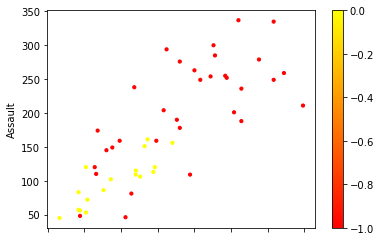

In [39]:
crime.plot(x='Murder',y='Assault',c=dbscan.labels_,kind='scatter',s=10,cmap=plt.cm.autumn)

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

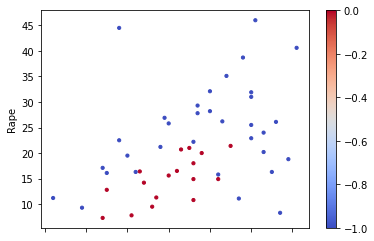

In [40]:
crime.plot(x='UrbanPop',y='Rape',c=dbscan.labels_,kind='scatter',s=10,cmap=plt.cm.coolwarm)